2020 OLYMPICS analysis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading of the dataset of olympics
althele_df=pd.read_csv("summer.csv")

In [3]:
# viewing of the loaded data 
althele_df.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
# to check the total number of columns and rows
althele_df.shape

(31165, 9)

In [5]:
# To check the information and memory of data loaded 
althele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [6]:
from numpy import integer

# To get full description of integer data 
althele_df.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [7]:
# to check for null values
null_value=althele_df.isna().any()  #any()will help you know the column that have a null value
null_value

Year          False
City          False
Sport         False
Discipline    False
Athlete       False
Country        True
Gender        False
Event         False
Medal         False
dtype: bool

In [8]:
# to get the sum of the null value of the column
null_value=null_value.sum()
null_value

1

In [9]:
# to print only the female athele from Russia won gold
russians=althele_df.query('Country=="RUS" & Gender=="Women" & Medal=="Gold"')
russians

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
21595,1996,Atlanta,Athletics,Athletics,"NIKOLAYEVA, Yelena",RUS,Women,10000M Walk,Gold
21613,1996,Atlanta,Athletics,Athletics,"MASTERKOVA, Svetlana",RUS,Women,1500M,Gold
21712,1996,Atlanta,Athletics,Athletics,"MASTERKOVA, Svetlana",RUS,Women,800M,Gold
22066,1996,Atlanta,Cycling,Cycling Road,"ZABIROVA, Zoulfia",RUS,Women,Individual Time Trial,Gold
22388,1996,Atlanta,Gymnastics,Artistic G.,"KHORKINA, Svetlana",RUS,Women,Uneven Bars,Gold
...,...,...,...,...,...,...,...,...,...
30371,2012,London,Gymnastics,Gymnastics Rhythmic,"MAKARENKO, Alina",RUS,Women,Group Competition,Gold
30372,2012,London,Gymnastics,Gymnastics Rhythmic,"NAZARENKO, Anastasia",RUS,Women,Group Competition,Gold
30373,2012,London,Gymnastics,Gymnastics Rhythmic,"SEVASTYANOVA, Karolina",RUS,Women,Group Competition,Gold
30386,2012,London,Gymnastics,Gymnastics Rhythmic,"KANAEVA, Evgeniya",RUS,Women,Individual All-Around,Gold


In [10]:
# To get the total number female Russians that won gold 
female_russian_gold_medalist=russians.Gender.value_counts()
female_russian_gold_medalist

Women    119
Name: Gender, dtype: int64

In [11]:
# to check for the first 6 USA athele 
althele_df.query('Country=="USA"').head(6)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
11,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
15,1896,Athens,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110M Hurdles,Gold
19,1896,Athens,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500M,Silver
21,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,400M,Gold
22,1896,Athens,Athletics,Athletics,"JAMISON, Herbert",USA,Men,400M,Silver


In [12]:
# To check top 10 countries that the altheles have participated more 
top_10_countries=althele_df.Country.value_counts().sort_values(ascending=False).head(10)
top_10_countries

USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
Name: Country, dtype: int64

<AxesSubplot:title={'center':'The top 10 countries in Olympics'}, ylabel='Country'>

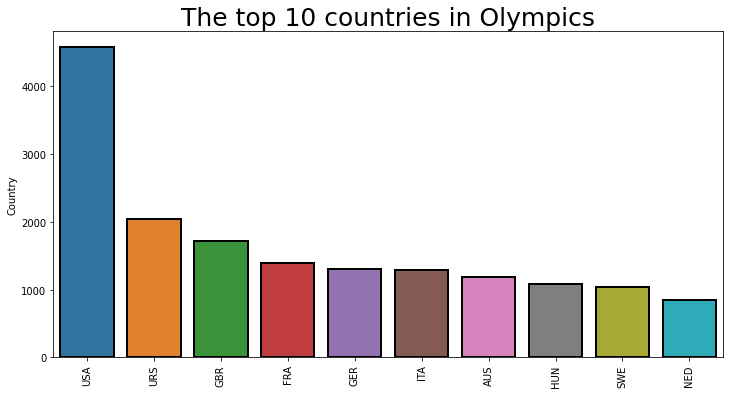

In [13]:
# to show the top 10 countries in a chart 
plt.figure(figsize=(12,6))
plt.title("The top 10 countries in Olympics", size=25)
plt.xticks(rotation=90)  #to rotate the country names (at the x-axis) by 90 degrees
sns.barplot(y=top_10_countries,x=top_10_countries.index ,linewidth=2,edgecolor="black")

In [14]:
# Selecting volleyball activity of the Event column and printing cities they took place 
volleyball_althele=althele_df[althele_df.Event=='Volleyball'].City.unique()  #there is Event and City at the heading
volleyball_althele

array(['Tokyo', 'Mexico', 'Munich', 'Montreal', 'Moscow', 'Los Angeles',
       'Seoul', 'Barcelona', 'Atlanta', 'Sydney', 'Athens', 'Beijing',
       'London'], dtype=object)

In [15]:
# Selecting differnt events of boxing 
boxing_althele=althele_df[althele_df.Sport=='Boxing'].Event.unique()   
boxing_althele

array(['- 47.63KG (Flyweight)', '+ 71.67KG (Heavyweight)',
       '47.63 - 52.16KG (Bantamweight)', '52.16 - 56.7KG (Featherweight)',
       '56.7 - 61.24KG (Lightweight)', '61.24 - 65.77KG (Welterweight)',
       '65.77 - 71.67KG (Middleweight)', '- 52.62KG (Bantamweight)',
       '52.62 - 57.15KG (Featherweight)', '57.15 - 63.5KG (Lightweight)',
       '63.5 - 71.67KG (Middleweight)', '- 50.8KG (Flyweight)',
       '+ 79.38KG (Heavyweight)', '50.8 - 53.52KG (Bantamweight)',
       '53.52 - 57.15KG (Featherweight)', '57.15 - 61.24KG (Lightweight)',
       '61.24 - 66.68KG (Welterweight)', '66.68 - 72.57KG (Middleweight)',
       '72.57 - 79.38KG (Light-Heavyweight)',
       '50.8 - 54KG (Bantamweight)', '54 - 57.15KG (Featherweight)',
       '- 51KG (Flyweight)', '+ 80KG (Heavyweight)',
       '51 - 54KG (Bantamweight)', '54 - 58KG (Featherweight)',
       '58 - 62KG (Lightweight)', '62 - 67KG (Welterweight)',
       '67 - 73KG (Middleweight)', '73 - 80KG (Light-Heavyweight)',
       

In [16]:
# To get the number of male and female in Olympics till 2012
gender_count=althele_df.Gender.value_counts()
gender_count

Men      22746
Women     8419
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x23677076170>,
 [Text(-0.1649767723993586, -1.0875581200876991, 'Men'),
  Text(0.1649767723993587, 1.0875581200876991, 'Women')],
 [Text(-0.08998733039965014, -0.5932135200478359, '73.0%'),
  Text(0.08998733039965019, 0.5932135200478359, '27.0%')])

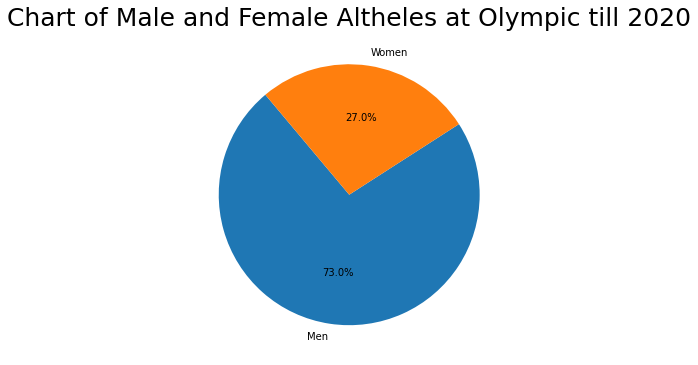

In [17]:
# Pie chart of male and female althele in Olympics uptil 2020
plt.figure(figsize=(10,6))
plt.title("Chart of Male and Female Altheles at Olympic till 2020", size=25)
plt.pie(gender_count,labels=gender_count.index, autopct='%1.1f%%',startangle=130)   #autopct is for it to show the percentage and the startangle to rotate the chart

([<matplotlib.patches.Wedge at 0x236770b9a80>,
 [Text(0.5405946271657451, 0.9579965809331102, 'Gold'),
  Text(-1.0998268838429113, -0.019514752788374803, 'Bronze'),
  Text(0.5575049754606022, -0.9482553465900804, 'Silver')],
 [Text(0.29486979663586094, 0.5225435895998782, '33.6%'),
  Text(-0.5999055730052243, -0.0106444106118408, '33.3%'),
  Text(0.3040936229785103, -0.5172301890491348, '33.1%')])

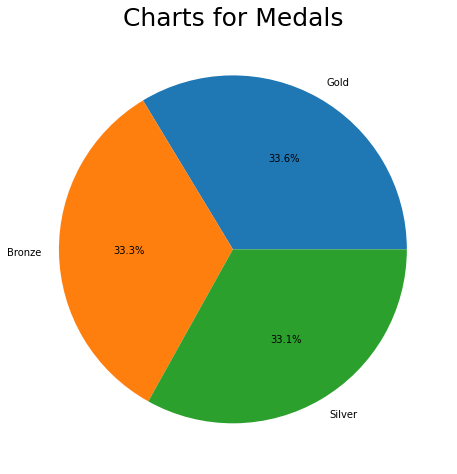

In [18]:
# The number of medals won at Olympics uptil 2020
medal_count=althele_df.Medal.value_counts()
medal_count

plt.figure(figsize=(10,8))
plt.title("Charts for Medals", size=25)
plt.pie(medal_count,labels=medal_count.index, autopct='%1.1f%%')

In [19]:
# Total number of female that won gold in each year

female_gold_medalist=althele_df[(althele_df.Gender=='Women') & (althele_df.Medal=='Gold')][['Year','Gender']]    #this [['Year','Gender']], is for them to print only year and gender  
female_gold_medalist=female_gold_medalist.groupby("Year").count().reset_index()  #to group the female by the year using groupby('Year') and count() to count the female and the reset_index() to add index to it
female_gold_medalist.tail(6)

,Year,Gender
20,1992,200
21,1996,259
22,2000,293
23,2004,298
24,2008,307
25,2012,303


<AxesSubplot:title={'center':'Female gold medalist for each year'}, xlabel='Year', ylabel='Gender'>

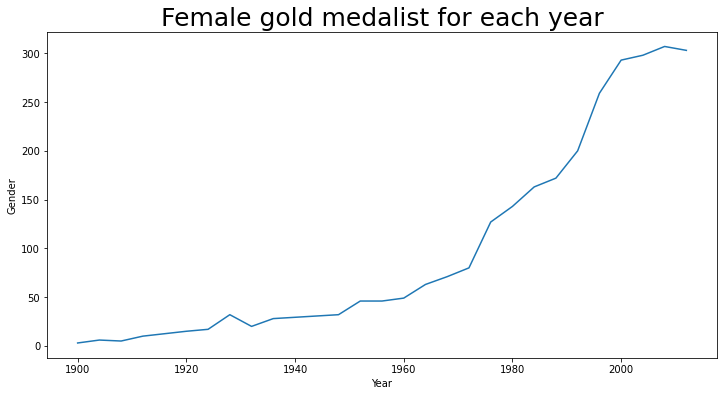

In [20]:
# line plot of gold medalist 

plt.figure(figsize=(12,6))
plt.title("Female gold medalist for each year", size=25)
# plt.xticks(rotation=90) 
sns.lineplot(y=female_gold_medalist.Gender,x=female_gold_medalist.Year)

<AxesSubplot:title={'center':'Female gold medalist for each year'}, xlabel='Year', ylabel='count'>

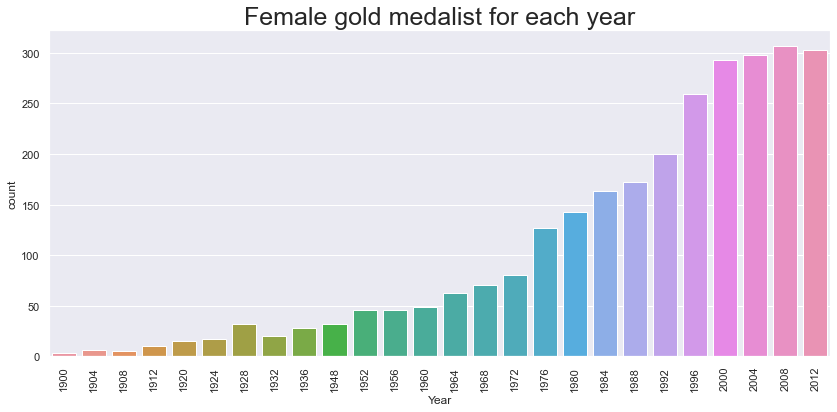

In [21]:
# Counting plot with bars of different ladies that won gold

from matplotlib import style

f_gold_medalists=althele_df[(althele_df.Gender=='Women') & (althele_df.Medal=='Gold')]

sns.set(style='darkgrid')
plt.figure(figsize=(14,6))
plt.title("Female gold medalist for each year", size=25)
plt.xticks(rotation=90) 
sns.countplot(x="Year",data=f_gold_medalists)

Text(0.5, 1.0, 'Plot of Female Gold medalist')

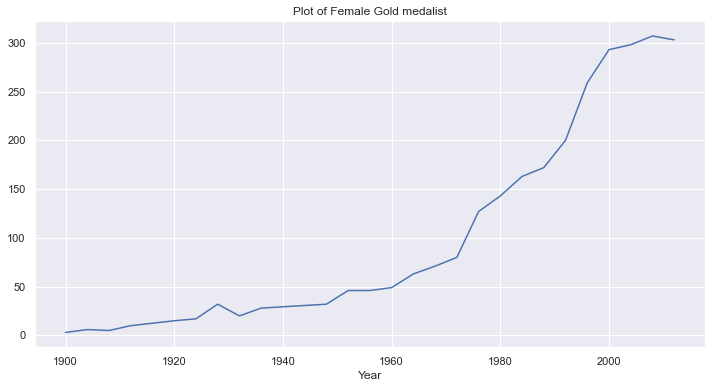

In [22]:
# Another way to show line plot of female gold medalist 

line_graph=f_gold_medalists.groupby("Year")['Gender'].value_counts()
plt.figure(figsize=(12,6))
line_graph.loc[:,'Women'].plot()
plt.title('Plot of Female Gold medalist')

In [23]:
# The persons that have the highest gold 
highest_gold_medalist=althele_df[(althele_df["Medal"]=="Gold")].value_counts()
goldMedalist=highest_gold_medalist.groupby("Athlete").count()  #grouping them by Athlete base on gold medal
goldMedalist=goldMedalist.sort_values(ascending=False)
goldMedalist=goldMedalist.head(10)

<AxesSubplot:xlabel='Athlete'>

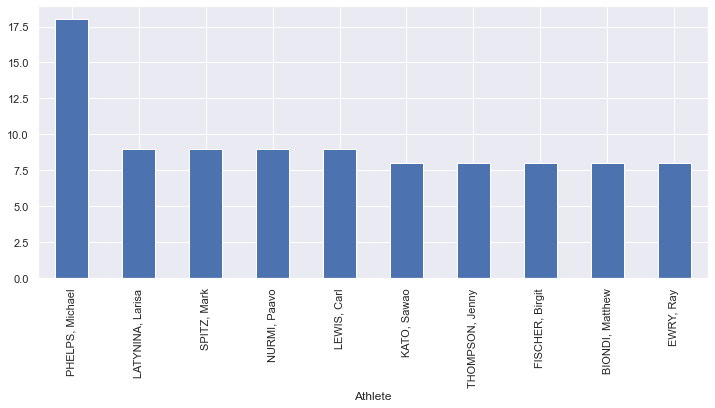

In [24]:
# bar chart of top 10 gold medalist since the start of Olymics till 2012
goldMedalist.plot.bar(figsize=(12,5))  #you can change the bar to line, to get a line graph

In [28]:
# To check the total number of cities and how many times that Olympics has hold from its start till 2012
number_of_cities=len(althele_df['City'].unique())
no_of_times=len(althele_df['City'])

print("The number of cities are ", number_of_cities)
print("We have had ",no_of_times,' Olympics.')

The number of cities are  22
We have had  31165  Olympics.


<AxesSubplot:xlabel='Year,City'>

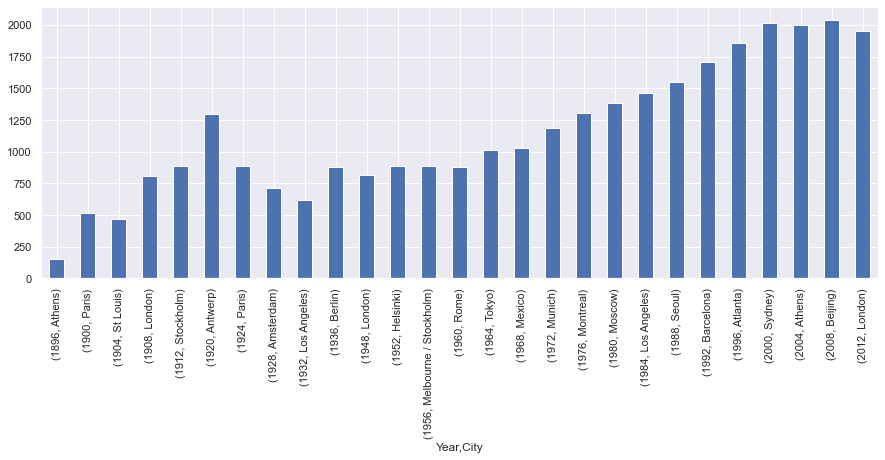

In [48]:
# City and the number of activities held on it
no_of_cities=althele_df.groupby("Year")["City"].value_counts()
no_of_cities.plot.bar(figsize=(15,5))

WHEN YOU ARE GOING THROUGH THIS, HOPE IT HELPED YOU. IF YOU HAVE ANY OTHER CODE THAT IS BETTER
DO NOT HESTATE TO SHOW